In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.shape

(1460, 81)

In [7]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
train_ID = train['Id']
test_ID = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [10]:
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
test.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# First glance at y_train

In [12]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

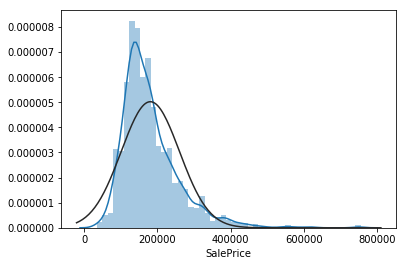

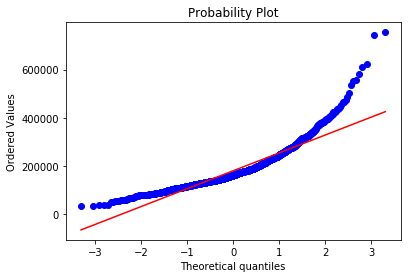

In [13]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

# Major variables x_train with y_train

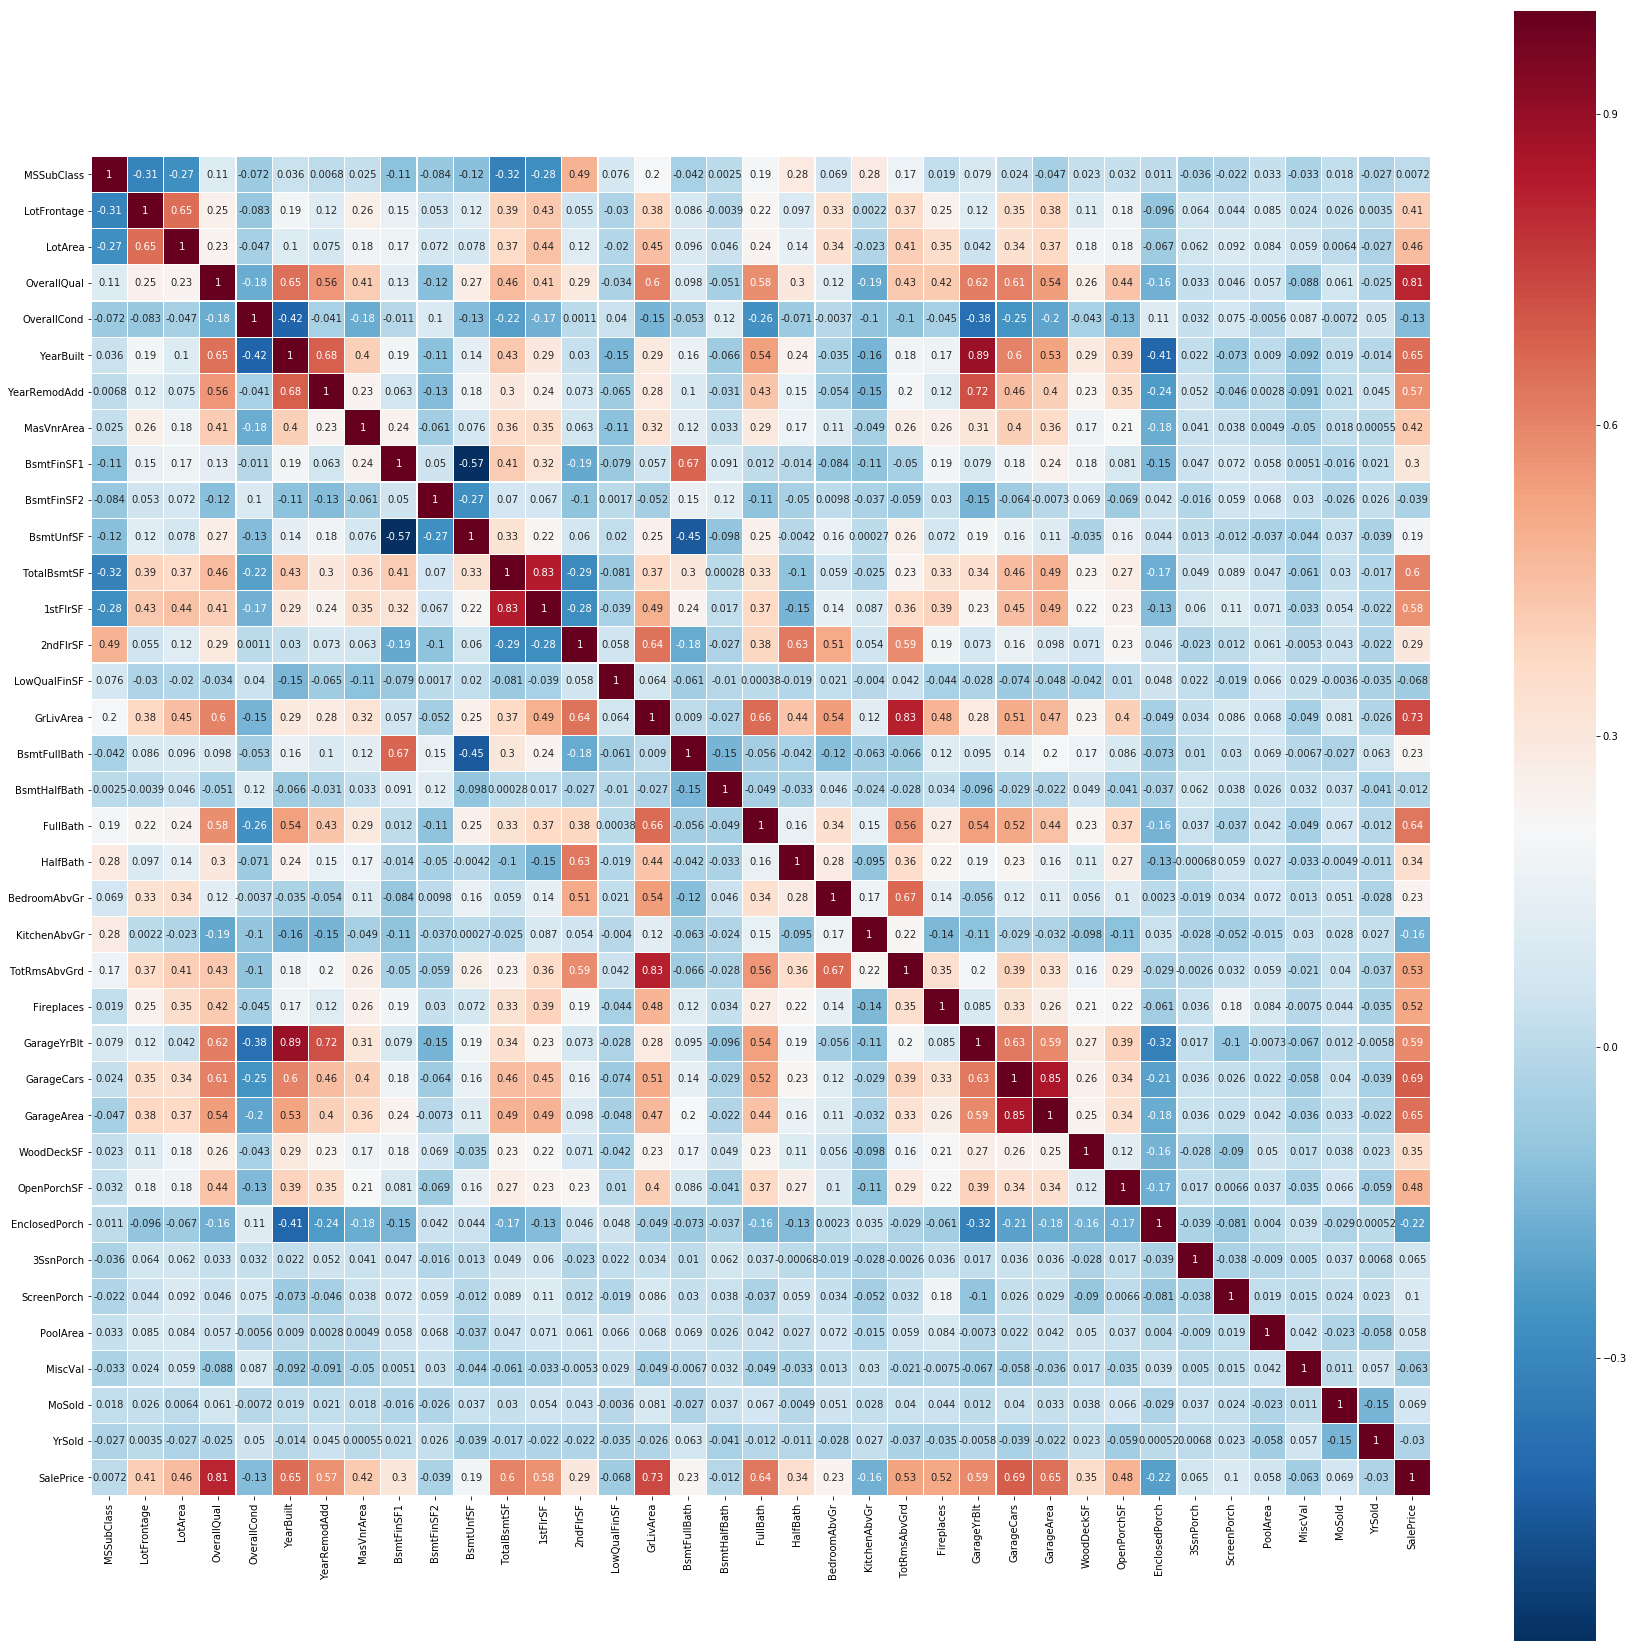

In [85]:
corrmat = train.corr(method='spearman')
f,ax = plt.subplots(figsize=(30,30))
g = sns.heatmap(corrmat, linewidths=0.2, square=True, annot=True, vmax=1, cmap='RdBu_r')
plt.show()

From the correlation heatmap, we find that the following pairs of features are highly correlated(r >0.8):

(1stFlrSF, TotalBsmtSF)

(TotRmsAbvGrd, GrLivArea)

(GarageYrBlt, YearBuilt)

(GarageArea, GarageCars)

For each pair, we will drop the one that has less correlation with sale price. (1stFlrSF, TotRmsAbvGrd, GarageYrBlt, GarageArea)

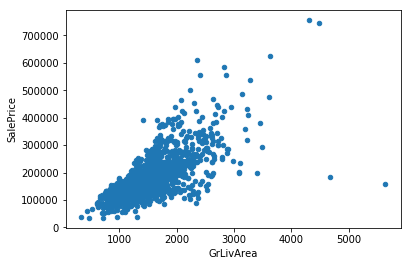

In [14]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

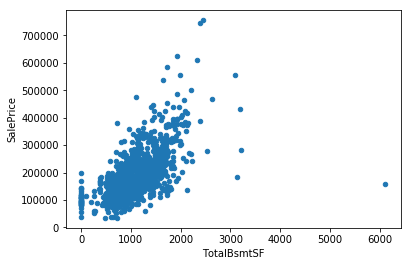

In [15]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

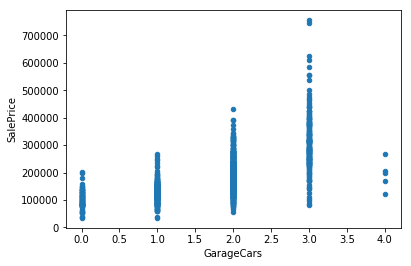

In [16]:
var = 'GarageCars'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

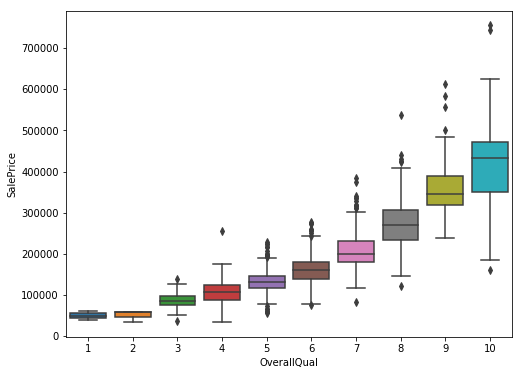

In [88]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)

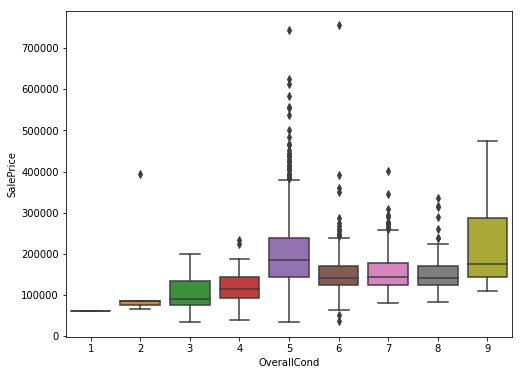

In [89]:
var = 'OverallCond'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)

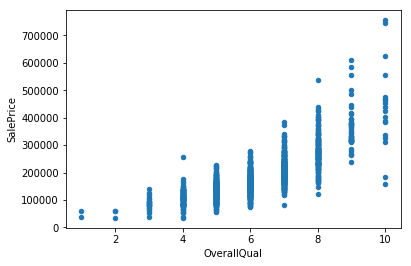

In [90]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

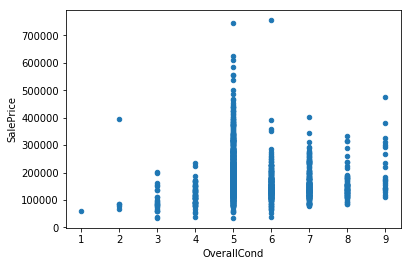

In [17]:
var = 'OverallCond'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

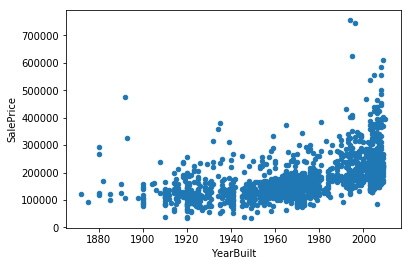

In [91]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

# Drop some outliers

<Figure size 432x288 with 0 Axes>

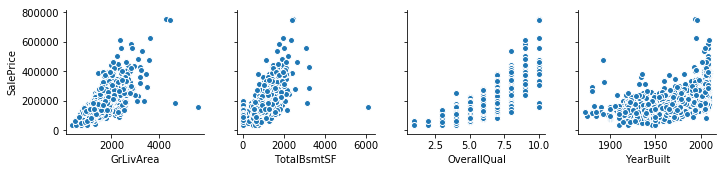

In [92]:
figure=plt.figure()
sns.pairplot(x_vars=['GrLivArea','TotalBsmtSF','OverallQual','YearBuilt'],y_vars=['SalePrice'],data=train,dropna=True)
plt.show()

In [93]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<250000)].index)
train = train.drop(train[(train['TotalBsmtSF']>6000) & (train['SalePrice']<200000)].index)
train = train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index)
train = train.drop(train[(train['YearBuilt']<1900) & (train['SalePrice']>400000)].index)

<Figure size 432x288 with 0 Axes>

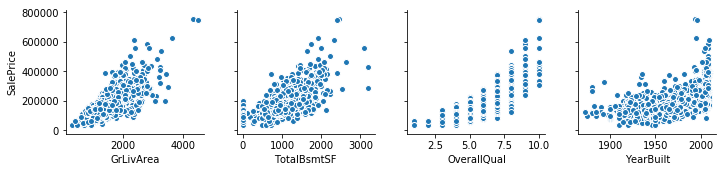

In [94]:
figure=plt.figure()
sns.pairplot(x_vars=['GrLivArea','TotalBsmtSF','OverallQual','YearBuilt'],y_vars=['SalePrice'],data=train,dropna=True)
plt.show()

In [95]:
train['SalePrice'].isnull().sum()

0

# log y_train

In [96]:
train['SalePrice_log'] = np.log(train['SalePrice'])

In [97]:
train['SalePrice_log'].isnull().sum()

0

In [98]:
#train.to_csv('train_outliers_dropped_logy.csv')

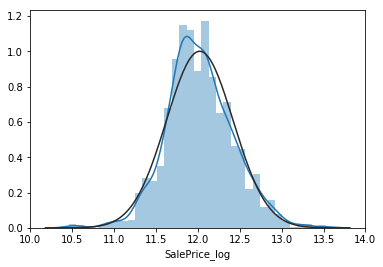

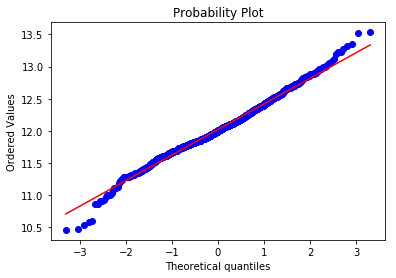

In [99]:
sns.distplot(train['SalePrice_log'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice_log'], plot=plt)

# Combine train and test

In [100]:
train_num = train.shape[0]
test_num = test.shape[0]
y_train = train.SalePrice.values
data_all = pd.concat((train, test)).reset_index(drop=True)
data_all.drop(['SalePrice'], axis=1, inplace=True)
data_all.drop(['SalePrice_log'], axis=1, inplace=True)

# Drop highly correlated continuous variables

In [101]:
data_all.drop(['1stFlrSF'], axis=1, inplace=True)
data_all.drop(['TotRmsAbvGrd'], axis=1, inplace=True)
data_all.drop(['GarageYrBlt'], axis=1, inplace=True)
data_all.drop(['GarageArea'], axis=1, inplace=True)

# Fill Missing Value

In [102]:
total = data_all.isnull().sum().sort_values(ascending=False)
percent = (data_all.isnull().sum()/data_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data.loc()[missing_data['Total']>0]

,Total,Missing Percent
PoolQC,2906,0.996913
MiscFeature,2810,0.963979
Alley,2717,0.932075
Fence,2345,0.804460
FireplaceQu,1420,0.487136
LotFrontage,485,0.166381
GarageCond,159,0.054545
GarageFinish,159,0.054545
GarageQual,159,0.054545
GarageType,157,0.053859


explanation:
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [103]:
data_all["PoolQC"] = data_all["PoolQC"].fillna("None")

In [104]:
data_all["MiscFeature"] = data_all["MiscFeature"].fillna("None")

In [105]:
data_all["Alley"] = data_all["Alley"].fillna("None")

In [106]:
data_all["Fence"] = data_all["Fence"].fillna("None")

In [107]:
data_all["FireplaceQu"] = data_all["FireplaceQu"].fillna("None")

In [108]:
data_all["LotFrontage"] = data_all.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [109]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data_all[col] = data_all[col].fillna('None')

In [110]:
data_all['GarageCars'] = data_all['GarageCars'].fillna(0)

In [111]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data_all[col] = data_all[col].fillna('None')

In [112]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data_all[col] = data_all[col].fillna(0)

In [113]:
data_all["MasVnrType"] = data_all["MasVnrType"].fillna("None")
data_all["MasVnrArea"] = data_all["MasVnrArea"].fillna(0)

In [114]:
data_all['MSZoning'] = data_all['MSZoning'].fillna(data_all['MSZoning'].mode()[0])

In [115]:
data_all = data_all.drop(['Utilities'], axis=1)

In [116]:
data_all["Functional"] = data_all["Functional"].fillna("Typ")

In [117]:
data_all['Electrical'] = data_all['Electrical'].fillna(data_all['Electrical'].mode()[0])

In [118]:
data_all['KitchenQual'] = data_all['KitchenQual'].fillna(data_all['KitchenQual'].mode()[0])

In [119]:
data_all['Exterior1st'] = data_all['Exterior1st'].fillna(data_all['Exterior1st'].mode()[0])
data_all['Exterior2nd'] = data_all['Exterior2nd'].fillna(data_all['Exterior2nd'].mode()[0])

In [120]:
data_all['SaleType'] = data_all['SaleType'].fillna(data_all['SaleType'].mode()[0])

In [121]:
#data_all['MSSubClass'] = data_all['MSSubClass'].fillna("None")

In [122]:
total = data_all.isnull().sum().sort_values(ascending=False)
percent = (data_all.isnull().sum()/data_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data.loc()[missing_data['Total']>0]

,Total,Missing Percent


# Convert some numerical to categorical

In [123]:
data_all['MSSubClass'] = data_all['MSSubClass'].apply(str)
data_all['OverallQual'] = data_all['OverallQual'].astype(str)
data_all['OverallCond'] = data_all['OverallCond'].astype(str)
data_all['YrSold'] = data_all['YrSold'].astype(str)
data_all['MoSold'] = data_all['MoSold'].astype(str)
data_all['YearBuilt'] = data_all['YearBuilt'].astype(str)
data_all['YearRemodAdd'] = data_all['YearRemodAdd'].astype(str)
#data_all['GarageYrBlt'] = data_all['GarageYrBlt'].astype(str)

# Label encoding ordinal variables

An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

Based on our understanding, the following variables are ordinal variables:

In [124]:
cols = ['MSSubClass','Street','Alley','LotShape','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond',
        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Functional',
       'FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MoSold',
        'YrSold','YearBuilt','YearRemodAdd']

In [125]:
from sklearn.preprocessing import LabelEncoder
for i in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data_all[i].values)) 
    data_all[i] = lbl.transform(list(data_all[i].values))

# Create new features

In [126]:
#data_all['TotalSF'] = data_all['TotalBsmtSF'] + data_all['1stFlrSF'] + data_all['2ndFlrSF']

In [127]:
data_all['HasWoodDeck'] = (data_all['WoodDeckSF'] == 0) * 1
data_all['HasOpenPorch'] = (data_all['OpenPorchSF'] == 0) * 1
data_all['HasEnclosedPorch'] = (data_all['EnclosedPorch'] == 0) * 1
data_all['Has3SsnPorch'] = (data_all['3SsnPorch'] == 0) * 1
data_all['HasScreenPorch'] = (data_all['ScreenPorch'] == 0) * 1

# Skewness + Log transformation

In [128]:
from scipy.stats import norm, skew
quantitative = data_all.dtypes[data_all.dtypes != "object"].index
skewed_feats = data_all[quantitative].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewness' :skewed_feats})
skewness.head(20)

,Skewness
MiscVal,21.932147
PoolArea,17.682542
LotArea,13.279061
LowQualFinSF,12.407713
3SsnPorch,11.368094
LandSlope,4.993598
KitchenAbvGr,4.298845
BsmtFinSF2,4.142863
EnclosedPorch,4.000796
ScreenPorch,3.931624


In [129]:
list_need_log=skewness[abs(skewness)>1].index.tolist()

In [130]:
for i in list_need_log:
    data_all[i] = np.log(1.01+data_all[i])
    newname = i + '_log'
    data_all.rename(columns={i: newname}, inplace=True)

# Transform rest categorical to dummy variables

In [131]:
data_all = pd.get_dummies(data_all, drop_first = True)
print(data_all.shape)

(2915, 202)


# Split train set and test set

In [132]:
train_cleaned = data_all[ : train_num]
test_cleaned = data_all[train_num :]

In [133]:
train_cleaned['SalePrice_log'] = train['SalePrice_log'].as_matrix()

In [134]:
train_cleaned['SalePrice_log'].isnull().sum()

0

In [135]:
train_cleaned['SalePrice'] = train['SalePrice'].as_matrix()

In [136]:
train_cleaned['SalePrice'].isnull().sum()

0

In [137]:
train_cleaned.shape

(1456, 204)

In [138]:
test_cleaned.shape

(1459, 202)

In [139]:
train_cleaned.to_csv('train_cleaned.csv',index = False)

In [140]:
test_cleaned.to_csv('test_cleaned.csv',index = False)